## **K-Medoids**

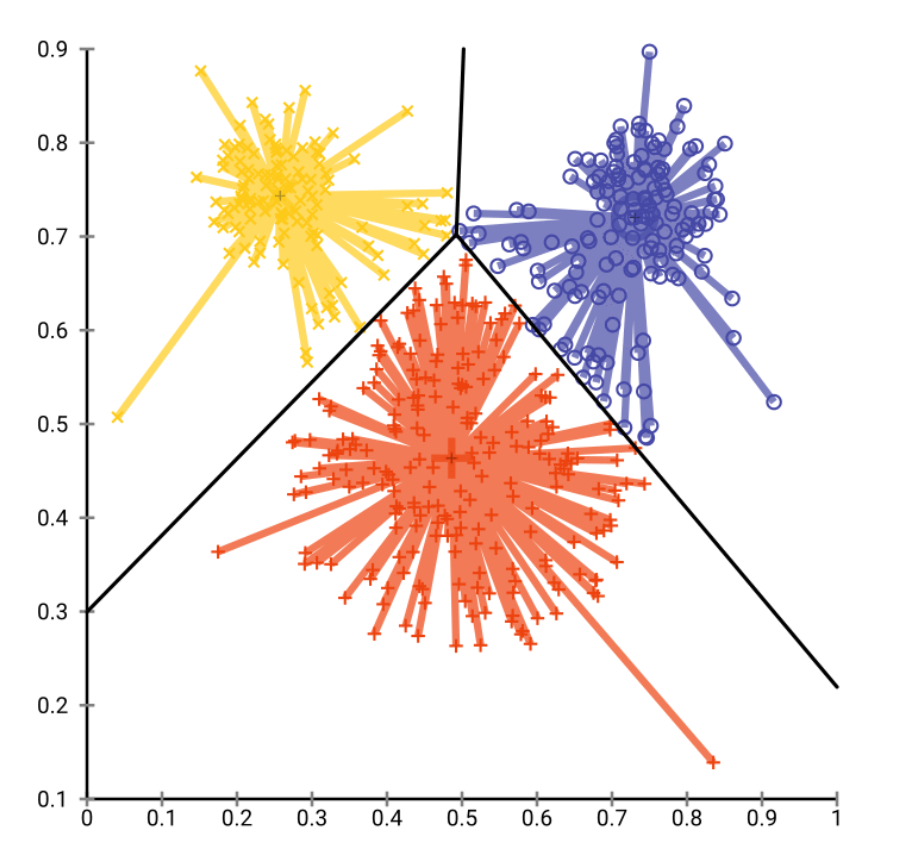

Just like we have Lloyd's algo for Kmeans,
- there is **Partioning around medoids** (PAM) for K-medoids


It is quite similar to Kmeans with few differences

Let's see how it works

**Step 1:** Initialization

The initialization of centroids (called medoids in K-medoids) is on same ideas as K-means
- i.e. we pick $k$ points randomly from dataset as our initial medoids.

**Step 2**: Assignment

Assignment is quite same as kmeans
- We use closest medoid method (proximity)

A datpoint ($x_i$) belongs to cluster $S_j$ if
- $medoid_j$ is the closest medoid

**Step 3**: Update/ recompute

In kmeans,
- we took the mean of points to find new centroid

$C_j = \frac{1}{|S_j|} * Σ_{x_i∈S_j} x_i$


But we don't want to do mean approach.

- So, we change this approach slightly

In k-medoids,

The Update of medoid is as follows



1.   Swap each medoid with a non medoid point




Let's understand this:

Say, we are given 10 datapoints and we choose two datapoints as medoids

i.e. k = 2

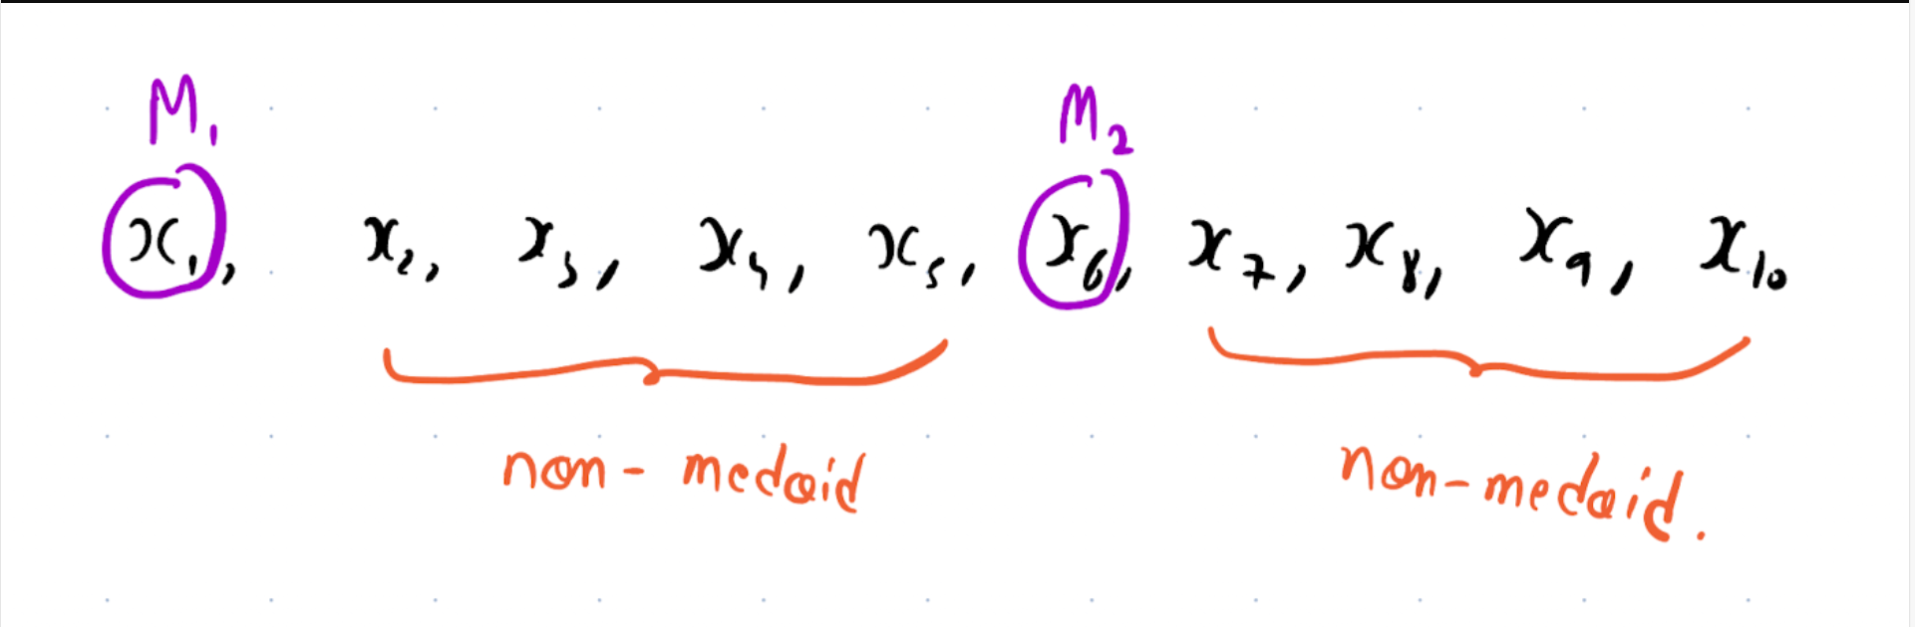

2. We compute Cost  (also known as dissimilarity) and
    - if cost decreases, keep the swap
    - else undo the swap

#### What's the cost/ loss in k-medoid?

Simple, it's total sum of distance

$$Loss = \sum_{i=1}^{K} \sum_{x_i \in S_j} \text{distance}(x_i, m_j)$$

$$Loss = \sum_{i=1}^{K} \sum_{x_i \in S_j} ||x_i -  m_j||^2$$

Notice that,
- we are trying to minimize intra cluster distance.


Note that
- distance can be eucld, manhattan, minkowski etc





First, we calculate loss value with
- $x_1, x_6$ as medoid

Say, this loss value comes out to be $l_1$

Now, we will swap medoid point with non medoid point
- asuume we made $M_1 = x_2$ and $M_2 = x_6$
- $M_2$ will remain the same

Notice that
- we only swapped single point i.e. $M_1$
- i.e. in one iteration, only single medoid is swapped with non medoid.
- Not all medoids are swapped.

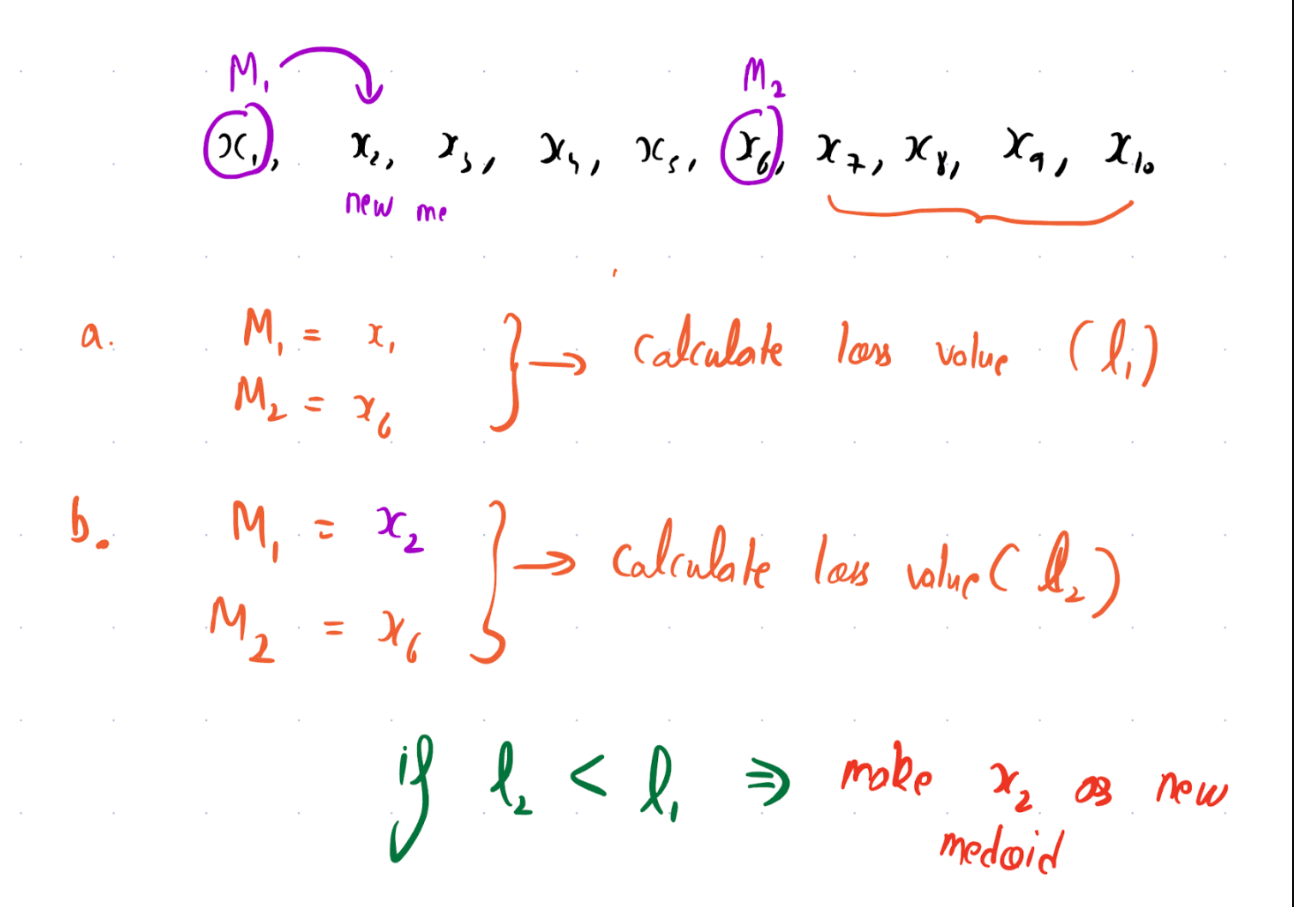

After swapping,
- we compute the loss ($l_2$)

If $l_2$ < $l_1$,
- we make $x_2$ as our new medoids


We will try all the swaps until there is no more beneficial swaps left
- or we have reached maximum number of iterations


#### What makes it better than other algo?


The massive advantage it holds over others is
- interpretibility
    - as medoids are the datapoints itself, so it is easy to understand and interpret them.

#### Any limitations ?

As we have to go through numerous swap and then
- compute the distances
- which makes Kmedoids slow

As the dataset grows, the computational demand will grow quadratically.
- So, it is better suited for small datasets.

## **`KMedoids Class Implementation from Scratch`**

In [ ]:
class my_KMedoids:

  @classmethod
  def get_label(cls, pt, cluster_centers, metric):
    if metric == 'euclidean':
      cluster_dist = np.sqrt(np.sum((pt - cluster_centers) ** 2, axis = 1))
    else:
      cluster_dist = np.sum(np.abs(pt - cluster_centers), axis = 1)
    return np.argmin(cluster_dist)

  @classmethod
  def check_random_state(cls, random_state):
    from sklearn.utils import check_random_state
    return check_random_state(random_state)

  @classmethod
  def sample_without_replacement(cls, n_population, n_samples, random_state_):
    from sklearn.utils.random import sample_without_replacement
    return sample_without_replacement(n_population = n_population, n_samples = n_samples, random_state = random_state_)


  @classmethod
  def get_label_n_inertia(cls, X, cluster_centers, metric):
    import numpy as np
    inertia = 0
    labels = np.zeros(X.shape[0])
    for idx, pt in enumerate(X):
      cluster_label = my_KMedoids.get_label(pt, cluster_centers, metric)
      labels[idx] = cluster_label
      inertia += np.sqrt(np.sum((cluster_centers[cluster_label] - pt) ** 2))
    return labels, inertia

  def __init__(self, n_clusters = 8, init = 'random', max_iter = 300, random_state = 1, metric = 'euclidean'):
    import numpy as np
    import warnings
    self.init = init
    if self.init not in {'random', 'k-medoids++’'} and type(self.init) != np.ndarray and type(self.init) != list:
      raise Exception('The argument for initialization method i.e. init must be either "random",  "k-medoids++’" or an array of cluster centers')
    elif self.init in {'random', 'k-medoids++’'}:
      self.n_clusters = n_clusters
    else:
      self.init = np.array(self.init)
      self.n_clusters = (self.init).shape[0]
    self.max_iter = max_iter
    self.random_state = random_state
    if metric not in {'euclidean', 'manhattan'}:
      raise Exception(f'{metric} is an invalid argument for "metric". It should be either "euclidean" or "manhattan"')
    else:
      self.metric = metric











































































  def fit(self, X):
    from copy import deepcopy
    import numpy as np
    n, d = X.shape
    if self.init not in {'random', 'k-medoids++’'} and ((self.init).shape[1] != X.shape[1]):
      raise Exception("The dimensions of the initialized cluster centers doesn't match with the dimensions of the data")
    random_state = self.check_random_state(self.random_state)
    final_cluster_centers = None
    final_labels = None

    if self.init == 'random':
      cluster_center_indexes = my_KMedoids.sample_without_replacement(n_population = n, n_samples = self.n_clusters, random_state_ = random_state)
      cluster_centers = X[cluster_center_indexes, :]
      self.initial_cluster_centers = cluster_centers

    elif self.init == 'k-medoids++':
      cluster_center_indexes = my_KMedoids.sample_without_replacement(n_population = n, n_samples = 1, random_state_ = random_state)
      cluster_centers = X[cluster_center_indexes, :]
      while len(cluster_center_indexes) < self.n_clusters:
        nearest_cluster_center_dist_sq = np.array([])
        for i, pt in enumerate(X):
          cluster_center_dist_sq = np.sum((pt - cluster_centers) ** 2, axis = 1)
          min_cluster_center_dist_sq = min(cluster_center_dist_sq)
          nearest_cluster_center_dist_sq = np.append(nearest_cluster_center_dist_sq, min_cluster_center_dist_sq)
        cluster_center_probas = nearest_cluster_center_dist_sq/np.sum(nearest_cluster_center_dist_sq)
        cluster_center_index = np.random.choice(range(n), p = cluster_center_probas)
        cluster_center = X[[cluster_center_index]]
        while cluster_center_index in cluster_center_indexes:
          rand_prob = np.random.rand()
          cluster_center_index = np.random.choice(range(n), p = cluster_center_probas)
          cluster_center = X[[cluster_center_index]]

        cluster_center_indexes = np.append(cluster_center_indexes, cluster_center_index)
        cluster_centers = np.vstack((cluster_centers, cluster_center))
        self.initial_cluster_centers = cluster_centers
    else:
      cluster_centers = self.init
      cluster_center_indexes = []
      for cluster_center in cluster_centers:
        if cluster_center not in X:
          raise Exception("The initialized medoids doesn't belong to the dataset")
        else:
          for i, pt in enumerate(X):
            if (cluster_center == pt).all():
              cluster_center_indexes.append(i)
              break
      cluster_center_indexes = np.array(cluster_center_indexes)
      cluster_centers = X[cluster_center_indexes]
      self.initial_cluster_centers = cluster_centers

    labels, least_inertia = my_KMedoids.get_label_n_inertia(X, cluster_centers, self.metric)

    for i in range(self.max_iter):
      j = 0
      swaps = 0
      while j < len(cluster_center_indexes):
        cluster_center_index = cluster_center_indexes[j]
        for k, pt in enumerate(X):
          cluster_center_indexes_after_swap = deepcopy(cluster_center_indexes)
          if k not in cluster_center_indexes:
            cluster_center_indexes_after_swap[j] = k
            cluster_centers_after_swap = X[cluster_center_indexes_after_swap]
            labels_after_swap, inertia_after_swap = my_KMedoids.get_label_n_inertia(X, cluster_centers_after_swap, self.metric)
            if inertia_after_swap < least_inertia:
              least_inertia = inertia_after_swap
              labels = labels_after_swap
              cluster_center_indexes = cluster_center_indexes_after_swap
              cluster_centers = cluster_centers_after_swap
              swaps += 1
        j += 1
      if swaps == 0:
        break

    self.labels_ = labels
    self.cluster_center_indexes_ = cluster_center_indexes
    self.cluster_centers_ = cluster_centers
    self.inertia_ = least_inertia


  def predict(self, X):
    if 'labels_' not in dir(self):
      raise Exception("The model has not been fit on data yet")
    import numpy as np
    n = X.shape[0]
    labels = np.zeros(n,)

    for idx, pt in enumerate(X):
      cluster_label = my_KMedoids.get_label(pt, self.cluster_centers_, self.metric)
      labels[idx] = cluster_label
    return labels


  def fit_predict(self, X):
    import numpy as np
    self.fit(X)
    return self.labels_